In [1]:
%load_ext watermark
%watermark -a Chan -d -v -p bs4,requests,xml

Chan 2019-07-31 

CPython 3.7.3
IPython 7.6.1

bs4 4.7.1
requests 2.22.0
xml unknown


In [2]:
from scrapAfrica import get_chat

In [3]:
??get_chat

In [4]:
chatdata = get_chat('http://vod.afreecatv.com/PLAYER/STATION/46201530')

In [5]:
chatdata

array([['ㅂㅇㄹ', 'coupling', '23.434'],
       ['보겸이 왔냐 ?', 'kof054', '31.258'],
       ['ㅂㅇㄹ', 'ghtmd486', '39.300'],
       ...,
       ['ㅇㅋ', 'gjrnr100', '1842.989'],
       ['두둥탁', 'vbzkxk', '1842.989'],
       ['ㄴㅇㅂㅈ', 'sky962455(2)', '1843.259']], dtype='<U129')

# db

In [1]:
import sqlite3

In [97]:
cur.close()
conn.close()

ProgrammingError: Cannot operate on a closed database.

In [2]:
conn = sqlite3.connect('./africa.db')
cur = conn.cursor()

In [106]:
cur.executescript("""




CREATE TABLE url(
id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
netloc_id INTEGER NOT NULL,
path TEXT NOT NULL,
param TEXT,
bj_id INTEGER NOT NULL,
seen BOOLEAN DEFAULT FALSE NOT NULL,
date TIMESTAMP DEFAULT CURRENT_TIMESTAMP NOT NULL
);

CREATE TABLE netloc(
id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
netloc TEXT NOT NULL,
domain TEXT NOT NULL
);

CREATE TABLE chat(
id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
content TEXT NOT NULL,
writer_id INTEGER  NOT NULL,
w_time TEXT NOT NULL, 
url_id INTEGER NOT NULL
);


CREATE TABLE jamak(
id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
content TEXT NOT NULL,
j_time TEXT NOT NULL,
url_id INTEGER NOT NULL
);



CREATE TABLE bj(
id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
name TEXT NOT NULL
);


CREATE TABLE writer(
id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
name TEXT NOT NULL
);
""")

cur.executemany("""
    INSERT INTO chat (content, writer_id, w_time, url_id)
    VALUES (?, ?, ?, '46201530')
""", chatdata)
conn.commit()

In [3]:
cur.execute("""
    SELECT * FROM chat;
""")
conn.commit()

# EDA

In [4]:
import pandas as pd

In [5]:
data = pd.DataFrame(cur.fetchall(), columns=['id', 'chat', 'userid', 'timestamp','url'])

In [6]:
data.set_index('id',inplace=True)

In [7]:
data.head()

,chat,userid,timestamp,url
id,,,,
1,ㅂㅇㄹ,coupling,23.434,46201530
2,보겸이 왔냐 ?,kof054,31.258,46201530
3,ㅂㅇㄹ,ghtmd486,39.300,46201530
4,하이,yyc32425,39.500,46201530
5,새벽에좀 키지마 미띤너마!!,thfhsp123,43.614,46201530


In [8]:
data.timestamp = data.timestamp.astype('float')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5506 entries, 1 to 5506
Data columns (total 4 columns):
chat         5506 non-null object
userid       5506 non-null object
timestamp    5506 non-null float64
url          5506 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 215.1+ KB


# 형태소분석

In [46]:
from konlpy.tag import Twitter

In [47]:
tw = Twitter()

C:\Users\skarn\Anaconda3\envs\DataAnalysis\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')
C:\Users\skarn\Anaconda3\envs\DataAnalysis\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [53]:
tw.morphs(data.chat.values)

TypeError: No matching overloads found for kr.lucypark.okt.OktInterface.tokenize(numpy.ndarray,java.lang.Boolean,java.lang.Boolean), options are:
	public java.util.List kr.lucypark.okt.OktInterface.tokenize(java.lang.String,java.lang.Boolean,java.lang.Boolean)

	at JPMethod::findOverload(native\common\jp_method.cpp:242)
	at JPMethod::findOverload(native\common\jp_method.cpp:245)
	at JPMethod::invoke(native\common\jp_method.cpp:253)
	at PyJPMethod::__call__(native\python\pyjp_method.cpp:142)


In [30]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

In [60]:
tmp = data.chat
text = '\n'.join(set(tmp))

In [63]:
text

"추하다 보겸\nㅇㅋ\nㅋㄹㅌ 각\n슈기보단 엘린이지\n형 \nㅋㅋㅋㅋㅋㅋㅋㅋ오오\n은근슬쩍 목소리듣기\n추하다.. 추해...\n오른쪽 잘봐봐\nㅋ기ㅋㅋㅋㅋㅋㅋㄱㅋㅋㅋ\nㅋㅋㅋㅋㅋ이꾸요잇\n형 보튜브각 ㅇㅋ?\n형 겨드랑이 빨래\n제아뒤 처음 읽어주네요.\n? 중대발표\n10살아니냐?\n나니모나카타\n역시 주진모\n보겨미형 유투브에서 엘린님한테 차이심 ㅋㅅㅋ\n역시 연예께 모기는 다르자너 ㅋㄱㅋㄱㅋㅋㄱㄱㅋ\n보하다 추겸아 그만하ㅏㅈ\n보겸님 열혈컷 몇갠가요\n형 그만해 이불킥각이야\n엘린 해명해\n절대안받짘ㅋ\n비지니스\n오빠 김치전같은거 왜 안만들어먹어\n어우 섹시햐\n좋아죽네\n♡e\n수고햇우\n하아..\n엥 왜갑자기자\n너요\n보튜브각 OK\n유튭각 ㅇㅋ\n해명하자\n오빠안녕\n아디오스\nㅁㄸ\n그럼 리액션해\n요즘 맞벌이안하면 못산다 저거다 개솔이다\n가태리 마을회관서 결혼하자 딱이네\n손절당함ㅋㅋㅋㅋㅋ\n고백 ㄱ4\n아니근데이건대왕모긴데\n형 근데수염길러주면안되? 키자루닮아서 좋은데\nㅎ0명\nㅌㅋ\n컷;\n왜 서울이야 형앙\n내일보자 형\n보겸님 제가 이메일 보냈었는데 cj996@naver.com요 \n결혼ㅋㅋㅋㅋㅋㅋ\n신이낫넼ㅋㅋㅋㅋㅋㅋㅋㅋ\n안녕하세요 반갑습니다\nㄸ\n와 생방 처음이야 ㄷ\n개 같네\n그만해!!!\n한손엘린잡고\n서울이네\n비즈..니스\n방송국 가자\n남친이랑 잇는듯\n2잔?\n형 사랑하오\n구독 안함\n맞아요 ㅋㅋㅋㅋㅋ\n슈기는\n보하다 추겸아ㅋㅋㅋㅋ\n누구에연?????????\nㅋㅋㄱㅋㄱㅋㄱㅋㅅㅋ케\n/하트//하트/\n이걸 모른척한다고???\n뭐여 본방이여?\n보겸이형 저 나이 26인데요 형방송 18살때부터 봣어요 그때저가 유재석급 비제이 될것같다햇는데 진짜로될줄이야 던파방송때부터봣는데 \n모기가 아니라 취집이였네\n보겸 주량 이슬톡톡 2잔\n게비스콘\n챠팅관리하는사람도없냐\n빼애애애애애애애애애애애애애애애애애애애애애애애애애애애애애애애빼애애애애애애애애애애애애애애애애애애애애애애애애애애애애애애애애애애애애애애애애애애애애애애애애♡\n

In [64]:
wc= WordCloud(font_path='C:Windows/Fonts/NanumGothic.ttf',
              width = 800,
              height = 800,
              background_color='white').generate(text)

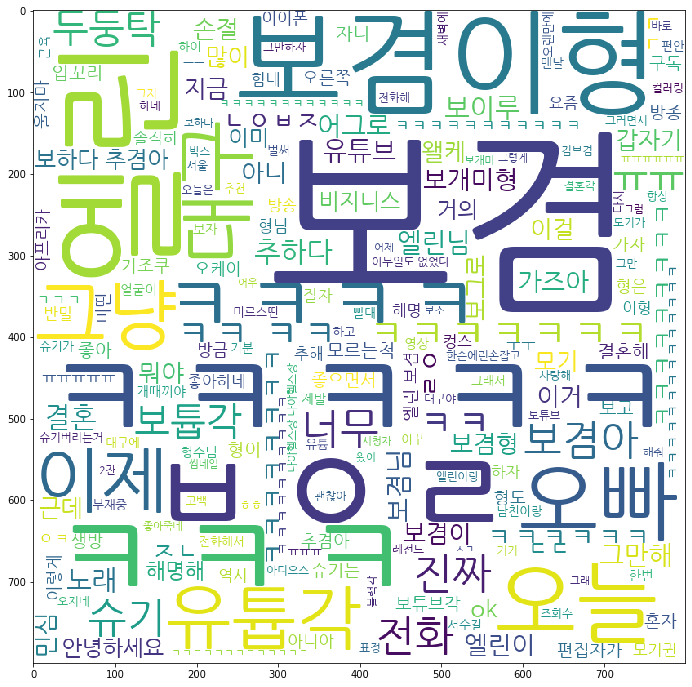

In [67]:
fig = plt.figure(figsize=(12,12))
plt.imshow(wc);
fig.savefig('bogum.png')